# Fully Connected Neural Networks

## Introduction

Fully Connected Neural Networks are the most basic form of Neural Networks. They are also known as Multi-layered Perceptrons (MLP). They are called fully connected because each neuron in one layer is connected to every neuron in the next layer. The input layer is the first layer and the output layer is the last layer. The layers in between are called hidden layers. The number of hidden layers and the number of neurons in each layer are hyperparameters that need to be tuned.

全连接神经网络是最基本的神经网络形式。它们也被称为多层感知器（MLP）。它们被称为全连接，因为每一层中的每个神经元都与下一层中的每个神经元相连。输入层是第一层，输出层是最后一层。中间的层称为隐藏层。隐藏层的数量和每层的神经元数量是需要调整的超参数。

Usually, MLP is used for classification problems. The input is a feature vector and the output is a class label. The output layer has as many neurons as the number of classes. The output of each neuron in the output layer is the probability of the input belonging to that class. The class with the highest probability is the predicted class.

通常，MLP用于分类问题。输入是特征向量，输出是类标签。输出层的神经元数量与类的数量相同。输出层中每个神经元的输出是输入属于该类的概率。具有最高概率的类是预测类。

In [100]:
# import libraries
import numpy as np
import pandas as pd
import os
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.manifold import TSNE

import torch
import torch.nn as nn
from torch.optim import SGD, Adam
import torch.utils.data as Data
import matplotlib.pyplot as plt
import seaborn as sns


In [101]:
import hiddenlayer as hl

In [102]:
from torchviz import make_dot

## Cases: Spam Email Classification (Binanry Classification)



In [103]:
#Dataset Download
spam = pd.read_csv(os.path.join("Data","spambase.data"), header=None)
spam.head()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [104]:
Spam_colname = """
word_freq_make:         continuous.
word_freq_address:      continuous.
word_freq_all:          continuous.
word_freq_3d:           continuous.
word_freq_our:          continuous.
word_freq_over:         continuous.
word_freq_remove:       continuous.
word_freq_internet:     continuous.
word_freq_order:        continuous.
word_freq_mail:         continuous.
word_freq_receive:      continuous.
word_freq_will:         continuous.
word_freq_people:       continuous.
word_freq_report:       continuous.
word_freq_addresses:    continuous.
word_freq_free:         continuous.
word_freq_business:     continuous.
word_freq_email:        continuous.
word_freq_you:          continuous.
word_freq_credit:       continuous.
word_freq_your:         continuous.
word_freq_font:         continuous.
word_freq_000:          continuous.
word_freq_money:        continuous.
word_freq_hp:           continuous.
word_freq_hpl:          continuous.
word_freq_george:       continuous.
word_freq_650:          continuous.
word_freq_lab:          continuous.
word_freq_labs:         continuous.
word_freq_telnet:       continuous.
word_freq_857:          continuous.
word_freq_data:         continuous.
word_freq_415:          continuous.
word_freq_85:           continuous.
word_freq_technology:   continuous.
word_freq_1999:         continuous.
word_freq_parts:        continuous.
word_freq_pm:           continuous.
word_freq_direct:       continuous.
word_freq_cs:           continuous.
word_freq_meeting:      continuous.
word_freq_original:     continuous.
word_freq_project:      continuous.
word_freq_re:           continuous.
word_freq_edu:          continuous.
word_freq_table:        continuous.
word_freq_conference:   continuous.
char_freq_;:            continuous.
char_freq_(:            continuous.
char_freq_[:            continuous.
char_freq_!:            continuous.
char_freq_$:            continuous.
char_freq_#:            continuous.
capital_run_length_average: continuous.
capital_run_length_longest: continuous.
capital_run_length_total:   continuous.
"""
col_names = [line.split(":")[0] for line in Spam_colname.strip().split("\n")]

col_names.append("label")



In [105]:
spam = pd.read_csv(os.path.join("Data","spambase.data"), names=col_names)
spam.head(10)

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,label
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
5,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1
6,0.00,0.00,0.00,0.0,1.92,0.00,0.00,0.00,0.00,0.64,...,0.00,0.054,0.0,0.164,0.054,0.000,1.671,4,112,1
7,0.00,0.00,0.00,0.0,1.88,0.00,0.00,1.88,0.00,0.00,...,0.00,0.206,0.0,0.000,0.000,0.000,2.450,11,49,1
8,0.15,0.00,0.46,0.0,0.61,0.00,0.30,0.00,0.92,0.76,...,0.00,0.271,0.0,0.181,0.203,0.022,9.744,445,1257,1
9,0.06,0.12,0.77,0.0,0.19,0.32,0.38,0.00,0.06,0.00,...,0.04,0.030,0.0,0.244,0.081,0.000,1.729,43,749,1


In [106]:
pd.value_counts(spam.label)

label
0    2788
1    1813
Name: count, dtype: int64

In [107]:
spam.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,label
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


In [108]:
# Divide the data into training and test sets
# 将数据随机切分为训练集和测试集
X = spam.iloc[:,0: 57].values
y = spam.label.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)


In [109]:
# Standardize the data for the first 57 columns, as the last column is the label(0 or 1 for spam or not spam)
# 前57列特征的数据标准化处理
scales = MinMaxScaler(feature_range=(0, 1)) 
X_train_s = scales.fit_transform(X_train)
# X_test_s = scales.transform(X_test)
X_test_s = scales.fit_transform(X_test)


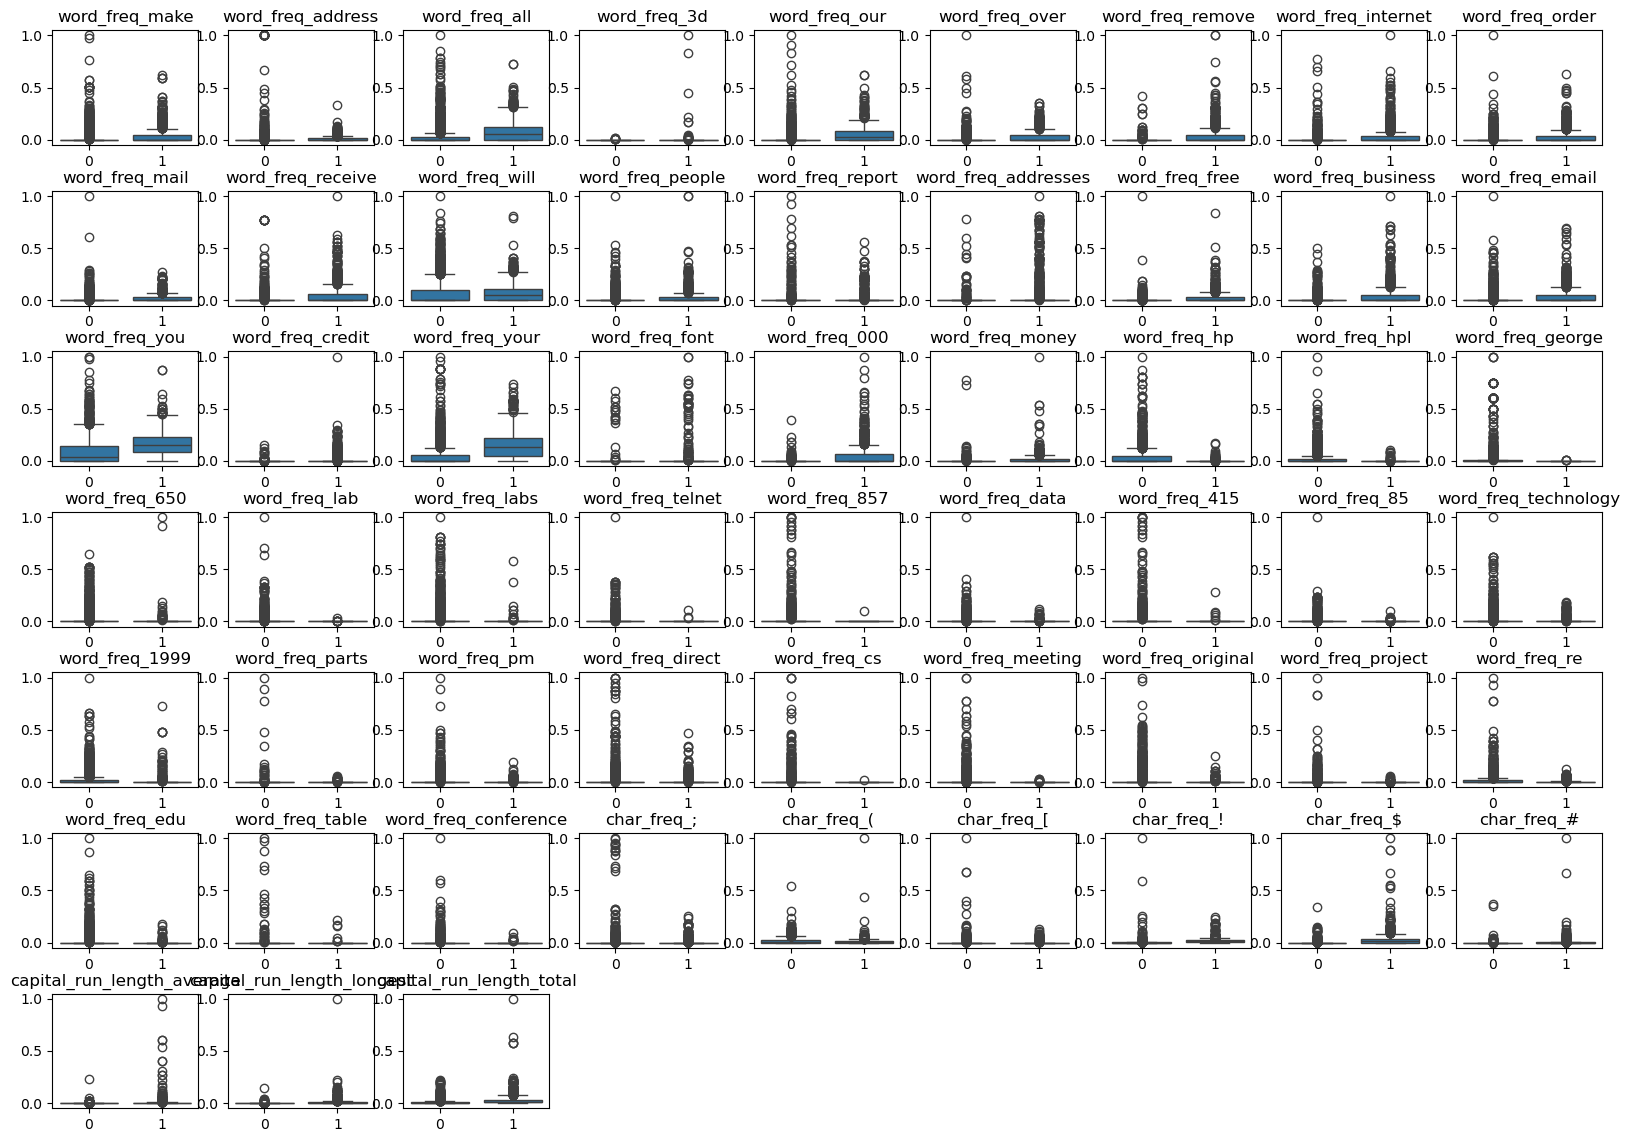

In [110]:
# Visualize the feature variables using boxplot
# 使用箱线图可视化特征变量
colname = spam.columns.values[:-1]
plt.figure(figsize=(20, 14))
for ii in range(len(colname)):
    plt.subplot(7, 9, ii + 1)
    sns.boxplot(x = y_train, y = X_train_s[:, ii])
    plt.title(colname[ii])
plt.subplots_adjust(hspace = 0.4)
plt.show()


From the plots, we could see some features have large differences in the distributions between the two types of emails.

有些特征在两种类型的分布上有较大差异

### Build the Model

In [111]:
# build the fully connected neural network
# 构建全连接神经网络

class myMLP(nn.Module):
    def __init__(self):
        super(myMLP, self).__init__()
        # Hidden layer 1
        # 隐藏层1
        self.hidden1 = nn.Sequential(
            nn.Linear(in_features=57, # 第一个隐藏层输入为数据的特征数
                      out_features=30, # 输出为神经元的个数
                      bias=True # 默认会有偏置
                      ),
            nn.ReLU()
        )

        # Hidden layer 2
        # 隐藏层2
        self.hidden2 = nn.Sequential(
            nn.Linear(30, 10),
            nn.ReLU()
        )

        # Classification layer
        # 分类层
        self.classify = nn.Sequential(
            nn.Linear(10, 2), # 二分类
            nn.Sigmoid()
        )

    # Define the forward propagation path
    # 定义前向传播路径
    def forward(self, x):
        fc1 = self.hidden1(x)
        fc2 = self.hidden2(fc1)
        output = self.classify(fc2)
        return fc1, fc2, output


In [112]:
# Output/Visual the network structure
# 输出网络结构
from torchsummary import summary

testnet = myMLP()
summary(testnet, input_size=(1, 57)) # 表示1个样本，每个样本有57个特征


Layer (type:depth-idx)                   Param #
├─Sequential: 1-1                        --
|    └─Linear: 2-1                       1,740
|    └─ReLU: 2-2                         --
├─Sequential: 1-2                        --
|    └─Linear: 2-3                       310
|    └─ReLU: 2-4                         --
├─Sequential: 1-3                        --
|    └─Linear: 2-5                       22
|    └─Sigmoid: 2-6                      --
Total params: 2,072
Trainable params: 2,072
Non-trainable params: 0


Layer (type:depth-idx)                   Param #
├─Sequential: 1-1                        --
|    └─Linear: 2-1                       1,740
|    └─ReLU: 2-2                         --
├─Sequential: 1-2                        --
|    └─Linear: 2-3                       310
|    └─ReLU: 2-4                         --
├─Sequential: 1-3                        --
|    └─Linear: 2-5                       22
|    └─Sigmoid: 2-6                      --
Total params: 2,072
Trainable params: 2,072
Non-trainable params: 0

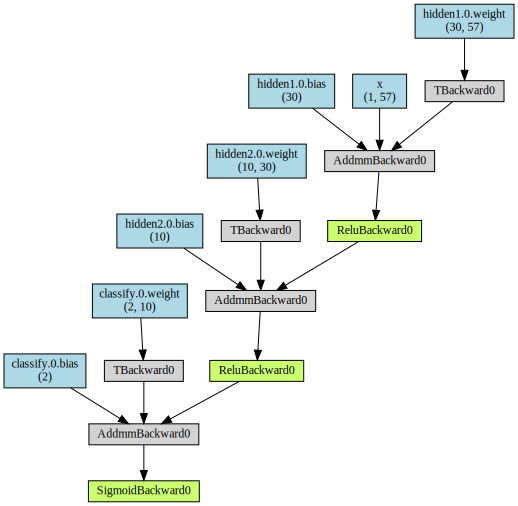

In [113]:
# Visualize the network structure
# 输出网络结构
testnet = myMLP()
x = torch.randn(1, 57).requires_grad_(True)
y = testnet(x)
myMLP_vis = make_dot(y, params=dict(list(testnet.named_parameters()) + [('x', x)]))
myMLP_vis


In [114]:
# Transfer the data to tensor
# 数据转为张量
X_train_nots = torch.from_numpy(X_train.astype(np.float32))
y_train_t = torch.from_numpy(y_train.astype(np.int64))
X_test_nots = torch.from_numpy(X_test.astype(np.float32))
y_test_t = torch.from_numpy(y_test.astype(np.int64))

# Use TensorDataset to bind X and y
# 用TensorDataset捆绑X和y
train_data_nots = Data.TensorDataset(X_train_nots, y_train_t)

# Define the data loader
# 定义数据加载器
train_nots_loader = Data.DataLoader(
    dataset = train_data_nots, 
    batch_size = 64, 
    shuffle = True, 
    num_workers = 1,
)


In [115]:
X_train_nots

tensor([[0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 1.6000e+00, 4.0000e+00,
         8.0000e+00],
        [0.0000e+00, 0.0000e+00, 3.8000e-01,  ..., 2.9530e+00, 3.4000e+01,
         1.2700e+02],
        [0.0000e+00, 0.0000e+00, 2.5000e-01,  ..., 4.4460e+00, 2.9000e+01,
         2.0900e+02],
        ...,
        [7.3000e-01, 0.0000e+00, 3.6000e-01,  ..., 3.7050e+00, 5.4000e+01,
         4.7800e+02],
        [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 2.4440e+00, 7.6000e+01,
         1.9800e+02],
        [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 1.0000e+00, 1.0000e+00,
         5.0000e+00]])

In [116]:
y_train_t


tensor([0, 0, 0,  ..., 1, 0, 0])

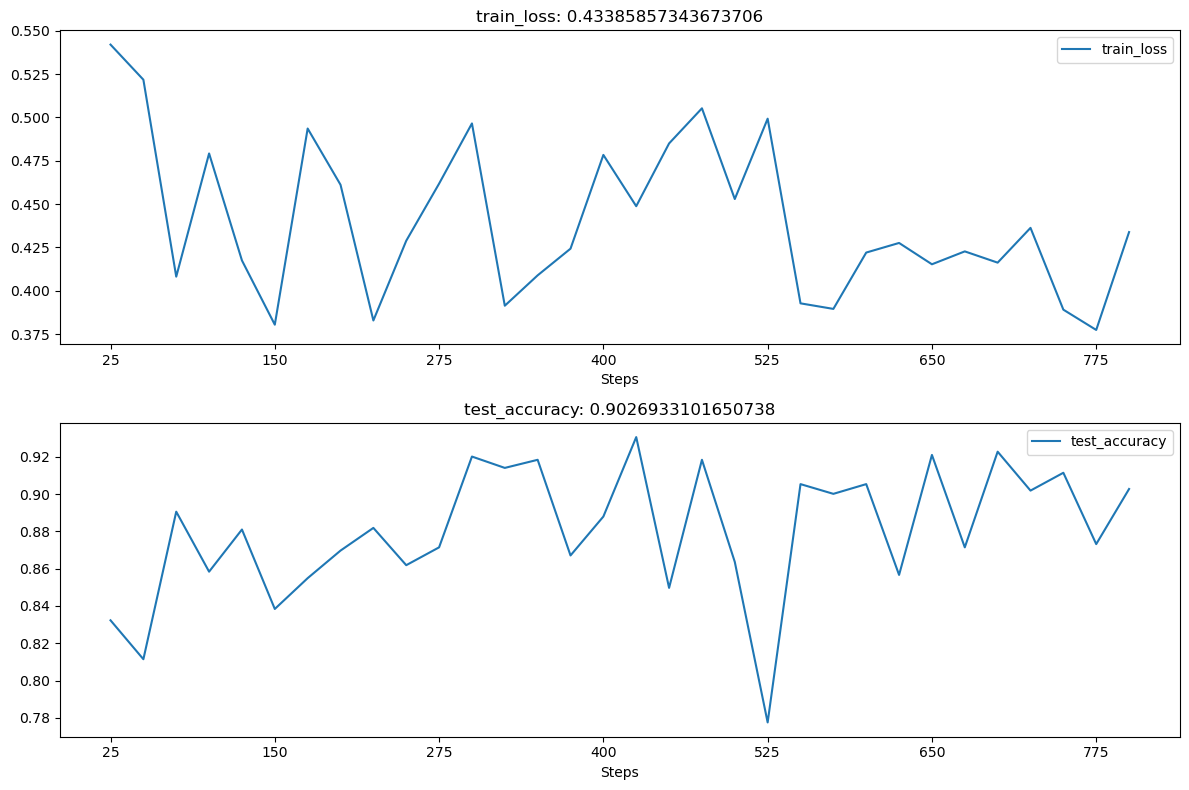

In [117]:
# Define the loss function and optimizer
# 定义优化器
optimizer = Adam(testnet.parameters(), lr=0.01)
loss_func = nn.CrossEntropyLoss()

# Record the indicators of the training process
# 记录训练过程的指标
history1 = hl.History()

# Use Canvas to visualize
# 使用Canvas可视化
canvas1 = hl.Canvas()
print_step = 25

for epoch in range(15):
    for step, (b_x, b_y) in enumerate(train_nots_loader):
        # Calculate the loss for each batch
        # 计算每个batch的损失
        _, _, output = testnet(b_x) 
        train_loss = loss_func(output, b_y)
        # Initialize the gradient to 0
        # 梯度初始化为0
        optimizer.zero_grad() 
        # Backpropagation
        # 反向传播
        train_loss.backward() 
        # Use the gradient for optimization
        # 使用梯度进行优化
        optimizer.step() 
        niter = epoch * len(train_nots_loader) + step + 1
        # Output after every print_step iterations
        # 每经过 print_step 次迭代后的输出
        if niter % print_step == 0:
            _, _, output = testnet(X_test_nots)
            _, pre_lab = torch.max(output, 1)
            test_accuracy = accuracy_score(y_test_t, pre_lab)
            # Add epoch, loss and accuracy
            # 添加epoch，损失和精度
            history1.log(niter, train_loss=train_loss, test_accuracy=test_accuracy)
            # Visualize the loss function and accuracy using two images
            # 使用两个图像可视化损失函数和精度
            with canvas1:
                canvas1.draw_plot(history1['train_loss'])
                canvas1.draw_plot(history1['test_accuracy'])


**迭代过程可以看出，损失函数一直在波动，MLP分类器没有收敛**

原因可能有:

- 数据没有标化处理
- 训练样本过少
- 神经元太多或太少

#### 使用预处理后的数据训练模型

使用fit_transform和transform标准化的数据集，重新训练。

In [118]:
# Visualize the network structure
# 数据转为张量
X_train_t = torch.from_numpy(X_train_s.astype(np.float32))
y_train_t = torch.from_numpy(y_train.astype(np.int64))
X_test_t = torch.from_numpy(X_test_s.astype(np.float32))
y_test_t = torch.from_numpy(y_test.astype(np.int64))
# Binding X and y using TensorDataset
# 用TensorDataset捆绑X和y
train_data = Data.TensorDataset(X_train_t, y_train_t)
# Define the data loader
# 定义数据加载器
train_loader = Data.DataLoader(
    # Dataset used
    # 使用的数据集
    dataset = train_data,
    # Batch size
    # 批量处理样本大小
    batch_size = 64, 
    # Random shuffle
    # 随机打乱
    shuffle = True, 
    num_workers = 1,
)


In [119]:
X_train_t


tensor([[0.0000, 0.0000, 0.0000,  ..., 0.0005, 0.0003, 0.0004],
        [0.0000, 0.0000, 0.0745,  ..., 0.0018, 0.0033, 0.0080],
        [0.0000, 0.0000, 0.0490,  ..., 0.0031, 0.0028, 0.0131],
        ...,
        [0.1853, 0.0000, 0.0706,  ..., 0.0025, 0.0053, 0.0301],
        [0.0000, 0.0000, 0.0000,  ..., 0.0013, 0.0075, 0.0124],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0003]])

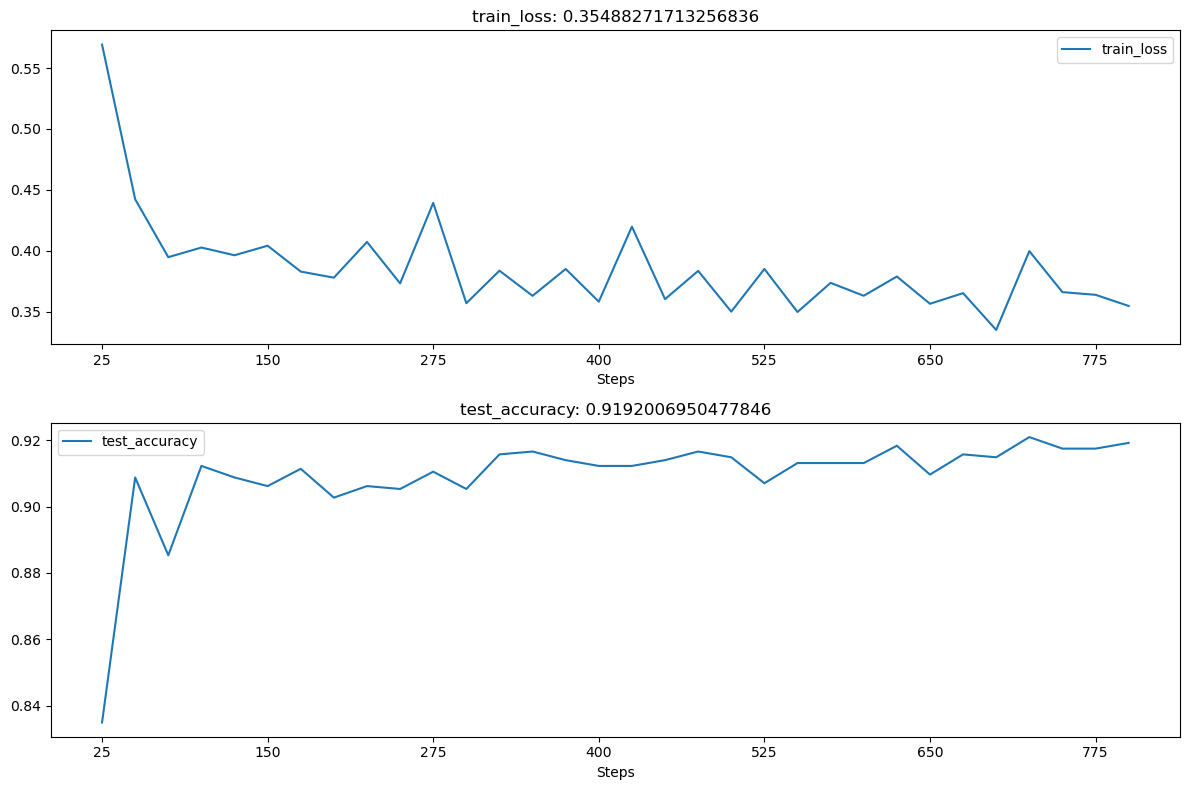

In [120]:
testnet1 = myMLP()
# 定义优化器
optimizer = Adam(testnet1.parameters(), lr=0.01)
loss_func = nn.CrossEntropyLoss()
# 记录训练过程的指标
history2 = hl.History()
# 使用Canvas可视化
canvas2 = hl.Canvas()
print_step = 25

for epoch in range(15):
    for step, (b_x, b_y) in enumerate(train_loader):
        # 计算每个batch的损失
        _, _, output = testnet1(b_x) # MLP在训练 batch上的输出
        train_loss = loss_func(output, b_y)
        optimizer.zero_grad() # 梯度初始化为0
        train_loss.backward() # 反向传播
        optimizer.step() # 使用梯度进行优化
        niter = epoch * len(train_loader) + step + 1
        # 每经过 print_step 次迭代后的输出
        if niter % print_step == 0:
            _, _, output = testnet1(X_test_t)
            _, pre_lab = torch.max(output, 1)
            test_accuracy = accuracy_score(y_test_t, pre_lab)
            # 添加epoch，损失和精度
            history2.log(niter, train_loss=train_loss, test_accuracy=test_accuracy)
            # 使用两个图像可视化损失函数和精度
            with canvas2:
                canvas2.draw_plot(history2['train_loss'])
                canvas2.draw_plot(history2['test_accuracy'])


结果显示数据标准化预处理对MLP网络非常重要。

In [121]:
# 计算模型在测试集上的最终精度
_, _, output = testnet1(X_test_t)
_, pre_lab = torch.max(output, 1)
test_accuracy = accuracy_score(y_test_t, pre_lab)
print('test_accuracy', test_accuracy)


test_accuracy 0.9113814074717637


#### 获取中间层的输出并可视化

前文的forward返回了fc1，fc2，output三个变量输出。

In [122]:
# 计算最终模型在测试集上的第二个隐含层的输出
_, test_fc2, _ = testnet1(X_test_t)
print('test_fc2.shape:', test_fc2.shape)
print(test_fc2)


test_fc2.shape: torch.Size([1151, 10])
tensor([[ 0.0000,  1.9238,  0.2922,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  5.6896,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000, 11.6116,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        ...,
        [ 0.0000,  0.0000,  2.0990,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  8.9747,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  6.8042,  ...,  0.0000,  0.0000,  0.0000]],
       grad_fn=<ReluBackward0>)


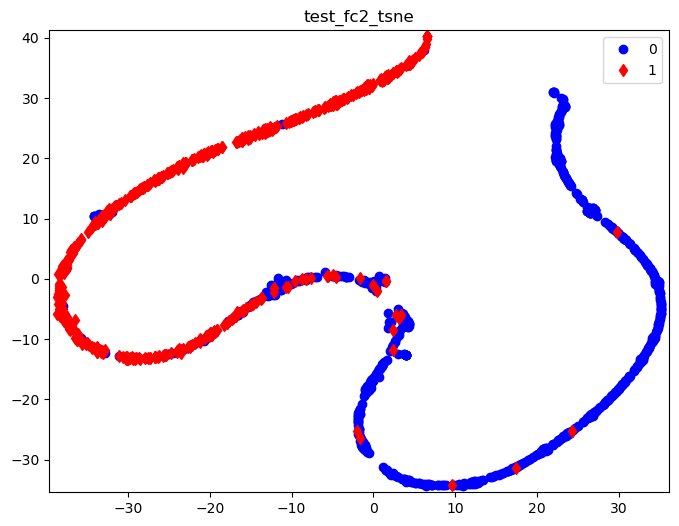

In [123]:
# 对输出进行降维并可视化
test_fc2_tsne = TSNE(n_components = 2).fit_transform(test_fc2.data.numpy())
# 特征可视化
plt.figure(figsize=(8, 6))
# 可视化前设置坐标系的取值范围
plt.xlim([min(test_fc2_tsne[:, 0] - 1), max(test_fc2_tsne[:, 0] + 1)])
plt.ylim([min(test_fc2_tsne[:, 1] - 1), max(test_fc2_tsne[:, 1] + 1)])
plt.plot(test_fc2_tsne[y_test == 0, 0], test_fc2_tsne[y_test == 0, 1],
         'bo', label = '0')
plt.plot(test_fc2_tsne[y_test == 1, 0], test_fc2_tsne[y_test == 1, 1],
         'rd', label = '1')
plt.legend()
plt.title('test_fc2_tsne')
plt.show()


两种点代表垃圾邮件和正常邮件的分布情况

#### 使用钩子获取中间层的输出

In [124]:
# 定义一个辅助函数，获取指定层名称的特征
activation = {} # 保存不同层的输出

def get_activaion(name):
    def hook(model, input, output):
        activation[name] = output.detach()
    return hook


In [125]:
# 获取分类层输出
testnet1.classify.register_forward_hook(get_activaion('classify'))
_, _, _ = testnet1(X_test_t)
classify = activation['classify'].data.numpy()
print('classification.shape:', classify.shape)


classification.shape: (1151, 2)


在activation字典中，键值classify对应的结果即为想要获取的中间层特征

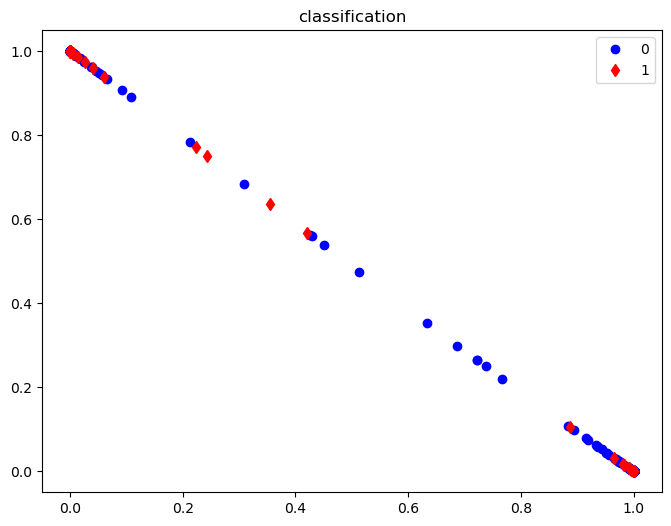

In [126]:
# 特征可视化
plt.figure(figsize=(8, 6))
plt.plot(classify[y_test == 0, 0], classify[y_test == 0, 1],
         'bo', label = '0')
plt.plot(classify[y_test == 1, 0], classify[y_test == 1, 1],
         'rd', label = '1')
plt.legend()
plt.title('classification')
plt.show()


## Case: Ionosphere data classification (binanry Classification)

Here, we will use a different method to define the MLP than the previous case. In the previous case, we only used the myMLP class inheriting from nn.Module.

在这里，我们将用一个和上文不太一样的MLP定义方法，在上文中，我们仅使用了myMLP类继承nn.Module。

Here, we will define the MLP as a class inheriting from the Dataset class, so that we can use PyTorch's data loader more conveniently.

这里，我们也将数据集定义为一个类，继承自Dataset类，这样可以更方便的使用PyTorch的数据加载器。

In [127]:
# -*- coding: utf-8 -*-
# pytorch mlp for binary classification
from numpy import vstack
from pandas import read_csv
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from torch import Tensor
from torch.optim import SGD
from torch.utils.data import Dataset, DataLoader, random_split
from torch.nn import Linear, ReLU, Sigmoid, Module, BCELoss
from torch.nn.init import kaiming_uniform_, xavier_uniform_

In [128]:



# dataset definition
class CSVDataset(Dataset):
    # load the dataset
    def __init__(self, path):
        # load the csv file as a dataframe
        df = read_csv(path)
        # store the inputs and outputs
        self.X = df.values[:, :-1]
        self.y = df.values[:, -1]
        # ensure input data is floats
        self.X = self.X.astype('float32')
        # label encode target and ensure the values are floats
        self.y = LabelEncoder().fit_transform(self.y)
        self.y = self.y.astype('float32')
        self.y = self.y.reshape((len(self.y), 1))

    # number of rows in the dataset
    def __len__(self):
        return len(self.X)

    # get a row at an index
    def __getitem__(self, idx):
        return [self.X[idx], self.y[idx]]

    # get indexes for train and test rows
    def get_splits(self, n_test=0.3):
        # determine sizes
        test_size = round(n_test * len(self.X))
        train_size = len(self.X) - test_size
        # calculate the split
        return random_split(self, [train_size, test_size])


In [129]:
# model definition
class MLP(Module):
    # define model elements
    def __init__(self, n_inputs):
        super(MLP, self).__init__()

        # input to first hidden layer
        self.hidden1 = Linear(n_inputs, 10)
        kaiming_uniform_(self.hidden1.weight, nonlinearity='relu')
        self.act1 = ReLU()

        # second hidden layer
        self.hidden2 = Linear(10, 8)
        kaiming_uniform_(self.hidden2.weight, nonlinearity='relu')
        self.act2 = ReLU()

        # third hidden layer and output
        self.hidden3 = Linear(8, 1)
        xavier_uniform_(self.hidden3.weight)
        self.act3 = Sigmoid()

    # forward propagate input
    def forward(self, X):

        # input to first hidden layer
        X = self.hidden1(X)
        X = self.act1(X)

        # second hidden layer
        X = self.hidden2(X)
        X = self.act2(X)
        
        # third hidden layer and output
        X = self.hidden3(X)
        X = self.act3(X)
        return X


In [130]:
# prepare the dataset
def prepare_data(path):
    # load the dataset
    dataset = CSVDataset(path)
    # calculate split
    train, test = dataset.get_splits()
    # prepare data loaders
    train_dl = DataLoader(train, batch_size=32, shuffle=True)
    test_dl = DataLoader(test, batch_size=1024, shuffle=False)
    return train_dl, test_dl


In [131]:
# train the model
def train_model(train_dl, model):
    # define the optimization
    criterion = BCELoss()
    optimizer = SGD(model.parameters(), lr=0.01, momentum=0.9)
    # enumerate epochs
    for epoch in range(100):
        # enumerate mini batches
        for i, (inputs, targets) in enumerate(train_dl):
            # clear the gradients
            optimizer.zero_grad()
            # compute the model output
            yhat = model(inputs)
            # calculate loss
            loss = criterion(yhat, targets)
            # credit assignment
            loss.backward()
            print("epoch: {}, batch: {}, loss: {}".format(epoch, i, loss.data))
            # update model weights
            optimizer.step()


In [132]:
# evaluate the model
def evaluate_model(test_dl, model):
    predictions, actuals = [], []
    for i, (inputs, targets) in enumerate(test_dl):
        # evaluate the model on the test set
        yhat = model(inputs)
        # retrieve numpy array
        yhat = yhat.detach().numpy()
        actual = targets.numpy()
        actual = actual.reshape((len(actual), 1))
        # round to class values
        yhat = yhat.round()
        # store
        predictions.append(yhat)
        actuals.append(actual)
    predictions, actuals = vstack(predictions), vstack(actuals)
    # calculate accuracy
    acc = accuracy_score(actuals, predictions)
    return acc

In [133]:
# make a class prediction for one row of data
def predict(row, model):
    # convert row to data
    row = Tensor([row])
    # make prediction
    yhat = model(row)
    # retrieve numpy array
    yhat = yhat.detach().numpy()
    return yhat

In [134]:

# prepare the data
path = './Data/ionosphere.csv'

train_dl, test_dl = prepare_data(path)
print(len(train_dl.dataset), len(test_dl.dataset))


246 105


In [135]:
# define the network
model = MLP(34)
print(model)

MLP(
  (hidden1): Linear(in_features=34, out_features=10, bias=True)
  (act1): ReLU()
  (hidden2): Linear(in_features=10, out_features=8, bias=True)
  (act2): ReLU()
  (hidden3): Linear(in_features=8, out_features=1, bias=True)
  (act3): Sigmoid()
)


In [136]:
# train the model
train_model(train_dl, model)
# evaluate the model
acc = evaluate_model(test_dl, model)
print('Accuracy: %.3f' % acc)


epoch: 0, batch: 0, loss: 1.0358283519744873
epoch: 0, batch: 1, loss: 0.9012540578842163
epoch: 0, batch: 2, loss: 0.7962891459465027
epoch: 0, batch: 3, loss: 0.7644940614700317
epoch: 0, batch: 4, loss: 0.7951623201370239
epoch: 0, batch: 5, loss: 0.8226372003555298
epoch: 0, batch: 6, loss: 0.7513635158538818
epoch: 0, batch: 7, loss: 0.7782711386680603
epoch: 1, batch: 0, loss: 0.7541792392730713
epoch: 1, batch: 1, loss: 0.7434225678443909
epoch: 1, batch: 2, loss: 0.7381263971328735
epoch: 1, batch: 3, loss: 0.7456280589103699
epoch: 1, batch: 4, loss: 0.7092370986938477
epoch: 1, batch: 5, loss: 0.6931843161582947
epoch: 1, batch: 6, loss: 0.6968390345573425
epoch: 1, batch: 7, loss: 0.6734863519668579
epoch: 2, batch: 0, loss: 0.6998022794723511
epoch: 2, batch: 1, loss: 0.6833025813102722
epoch: 2, batch: 2, loss: 0.6960444450378418
epoch: 2, batch: 3, loss: 0.7063448429107666
epoch: 2, batch: 4, loss: 0.6861135363578796
epoch: 2, batch: 5, loss: 0.7188461422920227
epoch: 2, 

In [97]:
# make a single prediction (expect class=1)
row = [1, 0, 0.99539, -0.05889, 0.85243, 0.02306, 0.83398, -0.37708, 1, 0.03760, 0.85243, -0.17755, 0.59755, -0.44945,
       0.60536, -0.38223, 0.84356, -0.38542, 0.58212, -0.32192, 0.56971, -0.29674, 0.36946, -0.47357, 0.56811, -0.51171,
       0.41078, -0.46168, 0.21266, -0.34090, 0.42267, -0.54487, 0.18641, -0.45300]
yhat = predict(row, model)
print('Predicted: %.3f (class=%d)' % (yhat, yhat.round()))


Predicted: 0.575 (class=1)


## Case: Ionosphere data classification (multiple Classification)

In [137]:
# -*- coding: utf-8 -*-
# pytorch mlp for multiclass classification
from numpy import vstack
from numpy import argmax
from pandas import read_csv
from sklearn.preprocessing import LabelEncoder, LabelBinarizer
from sklearn.metrics import accuracy_score
from torch import Tensor
from torch.optim import SGD, Adam
from torch.utils.data import Dataset, DataLoader, random_split
from torch.nn import Linear, ReLU, Softmax, Module, CrossEntropyLoss
from torch.nn.init import kaiming_uniform_, xavier_uniform_



In [138]:

# dataset definition
class CSVDataset(Dataset):
    # load the dataset
    def __init__(self, path):
        # load the csv file as a dataframe
        df = read_csv(path, header=None)
        # store the inputs and outputs
        self.X = df.values[:, :-1]
        self.y = df.values[:, -1]
        # ensure input data is floats
        self.X = self.X.astype('float32')
        # label encode target and ensure the values are floats
        self.y = LabelEncoder().fit_transform(self.y)
        # self.y = LabelBinarizer().fit_transform(self.y)

    # number of rows in the dataset
    def __len__(self):
        return len(self.X)

    # get a row at an index
    def __getitem__(self, idx):
        return [self.X[idx], self.y[idx]]

    # get indexes for train and test rows
    def get_splits(self, n_test=0.3):
        # determine sizes
        test_size = round(n_test * len(self.X))
        train_size = len(self.X) - test_size
        # calculate the split
        return random_split(self, [train_size, test_size])



In [139]:

# model definition
class MLP(Module):
    # define model elements
    def __init__(self, n_inputs):
        super(MLP, self).__init__()
        # input to first hidden layer
        self.hidden1 = Linear(n_inputs, 5)
        kaiming_uniform_(self.hidden1.weight, nonlinearity='relu')
        self.act1 = ReLU()
        # second hidden layer
        self.hidden2 = Linear(5, 6)
        kaiming_uniform_(self.hidden2.weight, nonlinearity='relu')
        self.act2 = ReLU()
        # third hidden layer and output
        self.hidden3 = Linear(6, 3)
        xavier_uniform_(self.hidden3.weight)
        self.act3 = Softmax(dim=1)

    # forward propagate input
    def forward(self, X):
        # input to first hidden layer
        X = self.hidden1(X)
        X = self.act1(X)
        # second hidden layer
        X = self.hidden2(X)
        X = self.act2(X)
        # output layer
        X = self.hidden3(X)
        X = self.act3(X)
        return X



In [140]:

# prepare the dataset
def prepare_data(path):
    # load the dataset
    dataset = CSVDataset(path)
    # calculate split
    train, test = dataset.get_splits()
    # prepare data loaders
    train_dl = DataLoader(train, batch_size=1, shuffle=True)
    test_dl = DataLoader(test, batch_size=1024, shuffle=False)
    return train_dl, test_dl



In [141]:

# train the model
def train_model(train_dl, model):
    # define the optimization
    criterion = CrossEntropyLoss()
    # optimizer = SGD(model.parameters(), lr=0.01, momentum=0.9)
    optimizer = Adam(model.parameters())
    # enumerate epochs
    for epoch in range(100):
        # enumerate mini batches
        for i, (inputs, targets) in enumerate(train_dl):
            targets = targets.long()
            # clear the gradients
            optimizer.zero_grad()
            # compute the model output
            yhat = model(inputs)
            # calculate loss
            loss = criterion(yhat, targets)
            # credit assignment
            loss.backward()
            print("epoch: {}, batch: {}, loss: {}".format(epoch, i, loss.data))
            # update model weights
            optimizer.step()



In [142]:

# evaluate the model
def evaluate_model(test_dl, model):
    predictions, actuals = [], []
    for i, (inputs, targets) in enumerate(test_dl):
        # evaluate the model on the test set
        yhat = model(inputs)
        # retrieve numpy array
        yhat = yhat.detach().numpy()
        actual = targets.numpy()
        # convert to class labels
        yhat = argmax(yhat, axis=1)
        # reshape for stacking
        actual = actual.reshape((len(actual), 1))
        yhat = yhat.reshape((len(yhat), 1))
        # store
        predictions.append(yhat)
        actuals.append(actual)
    predictions, actuals = vstack(predictions), vstack(actuals)
    # calculate accuracy
    acc = accuracy_score(actuals, predictions)
    return acc



In [143]:

# make a class prediction for one row of data
def predict(row, model):
    # convert row to data
    row = Tensor([row])
    # make prediction
    yhat = model(row)
    # retrieve numpy array
    yhat = yhat.detach().numpy()
    return yhat



In [145]:

# prepare the data
path = './Data/iris.csv'
train_dl, test_dl = prepare_data(path)
print(len(train_dl.dataset), len(test_dl.dataset))


105 45


In [146]:

# define the network
model = MLP(4)
print(model)


MLP(
  (hidden1): Linear(in_features=4, out_features=5, bias=True)
  (act1): ReLU()
  (hidden2): Linear(in_features=5, out_features=6, bias=True)
  (act2): ReLU()
  (hidden3): Linear(in_features=6, out_features=3, bias=True)
  (act3): Softmax(dim=1)
)


In [147]:

# train the model
train_model(train_dl, model)


epoch: 0, batch: 0, loss: 1.0608023405075073
epoch: 0, batch: 1, loss: 1.069378137588501
epoch: 0, batch: 2, loss: 1.1905616521835327
epoch: 0, batch: 3, loss: 1.1903053522109985
epoch: 0, batch: 4, loss: 1.0452587604522705
epoch: 0, batch: 5, loss: 1.04500150680542
epoch: 0, batch: 6, loss: 1.060742735862732
epoch: 0, batch: 7, loss: 1.1895232200622559
epoch: 0, batch: 8, loss: 1.1893582344055176
epoch: 0, batch: 9, loss: 1.1891025304794312
epoch: 0, batch: 10, loss: 1.046612024307251
epoch: 0, batch: 11, loss: 1.1885799169540405
epoch: 0, batch: 12, loss: 1.0663669109344482
epoch: 0, batch: 13, loss: 1.1880940198898315
epoch: 0, batch: 14, loss: 1.0474071502685547
epoch: 0, batch: 15, loss: 1.0429545640945435
epoch: 0, batch: 16, loss: 1.0658447742462158
epoch: 0, batch: 17, loss: 1.1872210502624512
epoch: 0, batch: 18, loss: 1.1869951486587524
epoch: 0, batch: 19, loss: 1.0496007204055786
epoch: 0, batch: 20, loss: 1.1865259408950806
epoch: 0, batch: 21, loss: 1.0450791120529175
epo

In [148]:

# evaluate the model
acc = evaluate_model(test_dl, model)
print('Accuracy: %.3f' % acc)


Accuracy: 0.978


In [149]:

# make a single prediction
row = [5.1, 3.5, 1.4, 0.2]
yhat = predict(row, model)
print('Predicted: %s (class=%d)' % (yhat, argmax(yhat)))


Predicted: [[9.9985135e-01 1.4863438e-04 9.8930963e-20]] (class=0)
